# Modelling

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
font = { 'family': 'DejaVu Sans', 'weight': 'bold', 'size': 16 }
plt.rc('font', **font)

In [3]:
data_path = '../../data/'

In [4]:
X_train = np.load(os.path.join(data_path, 'X_train.npy'), allow_pickle=True)
X_val = np.load(os.path.join(data_path, 'X_val.npy'), allow_pickle=True)
y_train = np.load(os.path.join(data_path, 'y_train.npy'), allow_pickle=True)
y_val = np.load(os.path.join(data_path, 'y_val.npy'), allow_pickle=True)

In [5]:
X_train[0]

array([  3.,   2.,  30., 107.,  27.,   0.,   0.,   0.,   1.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.])

## Dummy Classifier

In [6]:
dummy = DummyClassifier(random_state=42)

In [7]:
dummy.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

In [8]:
dummy.score(X_val, y_val)

0.7161700581395349

In [9]:
dummy.classes_

array([0, 1])

In [10]:
y_pred_dummy = dummy.predict(X_val)

In [11]:
f1_score(y_val, y_pred_dummy)

0.17159826068512035

## Gradient Boosting

In [12]:
model = GradientBoostingClassifier(random_state=42)

In [13]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [14]:
model.score(X_val, y_val)

0.8298691860465116

In [15]:
model.classes_

array([0, 1])

In [16]:
y_pred = model.predict(X_val)

In [17]:
f1_score(y_val, y_pred)

0.012236286919831224

## Ramdom Forest

In [18]:
model = RandomForestClassifier(n_estimators=10, random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [20]:
model.score(X_val, y_val)

0.8238735465116279

In [21]:
model.classes_

array([0, 1])

In [22]:
model.base_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
y_pred = model.predict(X_val)

In [24]:
f1_score(y_val, y_pred)

0.0839160839160839

### Classification Report

In [25]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     22823
           1       0.37      0.05      0.08      4697

    accuracy                           0.82     27520
   macro avg       0.60      0.52      0.49     27520
weighted avg       0.76      0.82      0.76     27520



In [26]:
importances = model.feature_importances_

In [27]:
indices = np.argsort(importances)[::-1]

In [28]:
with open('../../data/feature_names.txt') as f:
    feature_names = [ line.strip() for line in f.readlines() ]

In [29]:
# Print the feature ranking
print("Feature ranking:")
for f in range(len(feature_names))[:25]:
    print("%d. Feature %s [%d] (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))
print('etc')

Feature ranking:
1. Feature Age_of_Driver [3] (0.129107)
2. Feature Age_of_Vehicle [4] (0.111250)
3. Feature speed_limit [2] (0.031991)
4. Feature number_of_vehicles [0] (0.031722)
5. Feature number_of_casualties [1] (0.031000)
6. Feature day_of_week_2 [93] (0.016060)
7. Feature day_of_week_4 [95] (0.015934)
8. Feature day_of_week_1 [92] (0.015599)
9. Feature day_of_week_3 [94] (0.015271)
10. Feature day_of_week_0 [91] (0.014884)
11. Feature day_of_week_6 [97] (0.014533)
12. Feature day_of_week_5 [96] (0.013924)
13. Feature 1st_road_class_A [11] (0.013837)
14. Feature month_8 [105] (0.012467)
15. Feature month_5 [102] (0.012131)
16. Feature month_3 [100] (0.011925)
17. Feature month_11 [108] (0.011880)
18. Feature month_9 [106] (0.011876)
19. Feature 1st_road_class_Unclassified [16] (0.011860)
20. Feature month_10 [107] (0.011855)
21. Feature hour_17 [127] (0.011464)
22. Feature month_7 [104] (0.011412)
23. Feature month_6 [103] (0.011346)
24. Feature 1st_road_class_B [13] (0.011205)
2

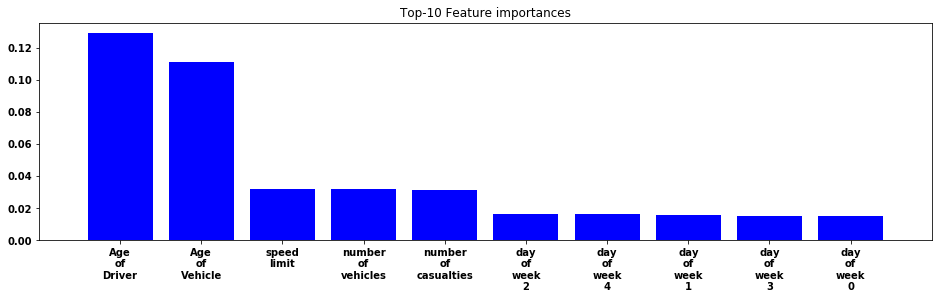

In [30]:
N = 10

# Plot the feature importances of the forest
plt.figure(figsize=(16, 4))
plt.title("Top-{} Feature importances".format(N))
# plt.bar(range(len(feature_names)), importances[indices], color="b", align="center")
plt.bar(range(N), importances[indices][:N], color="b", align="center")
# plt.xticks(range(len(feature_names)), indices)
plt.xticks(range(N), [ feature_names[index].replace('_', '\n') for index in indices[:N] ])
plt.xlim([-1, N])
plt.savefig('../../figures/modelling_Random_Forest_Top_10_Feature_Importances.png', bbox_inches="tight")
plt.show()

## Gaussian Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gnb = GaussianNB()

In [33]:
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
gnb.score(X_val, y_val)

0.5422965116279069

In [36]:
y_pred = gnb.predict(X_val)

In [37]:
f1_score(y_val, y_pred)

0.31431682090364726

### Classification Report

In [38]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66     22823
           1       0.21      0.61      0.31      4697

    accuracy                           0.54     27520
   macro avg       0.54      0.57      0.49     27520
weighted avg       0.76      0.54      0.60     27520



### Save model

In [39]:
import pickle

In [40]:
filename = '../../models/finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))